In [240]:
#Volosnov AS
import random
import math
import matplotlib.pyplot as plt

L = 300#кол-во бросков костей
transition = [[0.95, 0.05], [0.1, 0.9]]#Матрица переходов от одной кости к другой
emission = [[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]#Матрица эмиссий, показывает вероятности выпадения значений для каждого из кубиков
#функция генерирующая случайную последовательность для HMM
def gen_HMM(transition,emission,L):
    states = [] #состояние
    observations = [] #наблюдаемый результат
    i = 0
    if random.random() >= 2/3:
        P = 1
    else:
        P = 0
    while i<L:
        E = random.random()
        if P == 0 and E < transition[0][1]:
            P = 1
        elif P == 1 and E <transition[1][0]:
            P = 0
        if P == 1:
            states.append(1)
            if random.random()<= emission[1][5]:
                observations.append(6)
            else:
                observations.append(random.randint(1,5))      
        else:
            states.append(0)
            observations.append(random.randint(1,6))
        i += 1
    return(states,observations)
states, observations = gen_HMM(transition,emission,L)    
print(states,'\n', observations)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1] 
 [6, 6, 6, 6, 5, 6, 4, 6, 6, 6, 4, 1, 4, 6, 6, 5, 6, 2, 2, 4, 4, 6, 3, 5, 3, 6, 4, 1, 2, 2, 1, 3, 

In [241]:
#Алгоритм Ветерби
def Veterbi(transition,emission,L,observations):
    #Инициализация
    V_k = []#Вероятность того что путь с наиб. вероятностью заканчивается заканчивается в состоянии k при наблюдении i
    P_v = []#Совместная веростность последовательности наблюдений и последовательности состояний
    for i in range(0,len(transition)):
        V_k.append([0]*L)
    V_k[0][0] = math.log(emission[0][observations[0] - 1]) + math.log((2 / 3))
    V_k[1][0] = math.log(emission[1][observations[0] - 1]) + math.log((1 / 3))
    for i in range(0,len(transition)):
        P_v.append([0]*(L-1))
    #Рекурсия
    #Значения были логарфимрованы для защиты от потери точночти
    for i in range(1,L):
        if V_k[0][i - 1] + math.log(transition[0][0]) >= V_k[1][i - 1] + math.log(transition[1][0]):
            M_0 = V_k[0][i - 1] + math.log(transition[0][0])
        else:
            M_0 = V_k[1][i - 1] + math.log(transition[1][0])
        if V_k[1][i - 1] + math.log(transition[1][1]) >= V_k[0][i - 1] + math.log(transition[0][1]):
            M_1 =V_k[1][i - 1] + math.log(transition[1][1])
        else:
            M_1 = V_k[0][i - 1] + math.log(transition[0][1])
        V_k[0][i] = math.log(emission[0][observations[i] - 1]) +  M_0
        V_k[1][i] = math.log(emission[1][observations[i] - 1]) +  M_1
        if V_k[0][i - 1]+math.log(transition[0][0]) > V_k[1][i - 1]+math.log(transition[1][1]):
            P_v[0][i - 1] = 0
        else:
            P_v[0][i - 1] = 1
        if V_k[1][i - 1]+math.log(transition[1][0]) > V_k[0][i - 1]+math.log(transition[0][1]):
            P_v[1][i - 1] = 1
        else:
            P_v[1][i - 1] = 0
    #Поиск наиболее вероятной траектории
    true_traekt = [0]*L
    if V_k[0][L - 1] < V_k[1][L - 1]:
        true_traekt[L - 1] = 1
    else:
        true_traekt[L - 1] = 0
        
    for i in range(0,L - 1):
        true_traekt[L - (i + 2)] = P_v[true_traekt[L - (i + 1)]][L - (i + 2)]
    return (true_traekt)
true_traekt = Veterbi(transition,emission,L,observations)
print(true_traekt)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Кол-во совпадений: 235 Кол-во не совпавших: 65 Частота совпадений: 0.7833333333333333


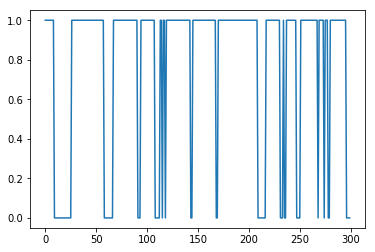

In [242]:
sovpad = []
sov = 0
ne_sov = 0
for i in range(L):
    if states[i] == true_traekt[i]:
        sovpad.append(1)
        sov += 1
    else:
        sovpad.append(0)
        ne_sov += 1
print("Кол-во совпадений:",sov,"Кол-во не совпавших:",ne_sov, "Частота совпадений:",float(sov/L))
plt.plot(sovpad) #график совпадений
plt.show()

In [243]:
#Алгоритм просмотра вперед
def forward_look(transition,emission,L,observations):
    F_k = []#Вероятность наблюдения последовательности при требовании что путь равен k=len(transition)
    for i in range(0,len(transition)):
        F_k.append([0]*(L+1))
    F_k[0][0] = F_k[1][0] = 1
    F_k[0][1] = emission[0][observations[0]-1]*(2 / 3)
    F_k[1][1] = emission[1][observations[0]-1]*(1 / 3)
    i=2
    while i<=L:
        sum_1 = F_k[0][i-1]*transition[0][0] + F_k[1][i-1]*transition[1][0]
        sum_2 = F_k[1][i-1]*transition[1][1] + F_k[0][i-1]*transition[0][1]
        F_k[0][i] = emission[0][observations[i-1]-1]*sum_1
        F_k[1][i] = emission[1][observations[i-1]-1]*sum_2
        i += 1
    check = F_k[0][L] + F_k[1][L]
    return (F_k, check)
F_k,check = forward_look(transition,emission,L,observations)
#F_k[0] - честная кость F_k[1] - нечестная кость check -проверка
print(F_k[0], '\n', F_k[1], '\n', check)

[1, 0.1111111111111111, 0.020370370370370365, 0.004521604938271604, 0.0013077417695473248, 0.0004752625600137174, 9.949719400148606e-05, 2.6863028349932367e-05, 5.261441791878818e-06, 1.2979125819394052e-06, 4.1687802708838863e-07, 1.616653252580619e-07, 3.42411170553332e-08, 6.212951960918534e-09, 1.0578005786775488e-09, 2.034112547971128e-10, 4.881430567858389e-11, 9.240559800555903e-12, 2.163660559771815e-12, 4.0640110850212543e-13, 7.027108401459377e-14, 1.1693303493177341e-14, 1.908330010598961e-15, 3.326250923476398e-16, 5.556722278284526e-17, 9.087004849481676e-18, 1.4694038815309747e-18, 2.5022451775972436e-19, 4.1322533588642746e-20, 6.716915172916853e-21, 1.0826313754352461e-21, 1.7369715995009739e-22, 2.7797516902274864e-23, 4.442340264771878e-24, 7.093830096361224e-25, 1.1323029364203547e-25, 1.8069263617927075e-26, 2.971656234594791e-27, 4.819800636704062e-28, 7.759325248805799e-29, 1.244094013253698e-29, 1.9902623893325284e-30, 3.18001841473304e-31, 5.077507345032634e-32,

In [244]:
#Алоритм просмотра назад
def backward_look(transition,emission,L,observations):
    B_k = []# эквивалентно F_k, но вычисляется обратной рекурсией
    for i in range(0,len(transition)):
        B_k.append([0]*(L+1))
    B_k[0][L] = B_k[1][L] = 1
    i = L-1
    while i>=0:
        B_k[0][i] = (emission[0][observations[i]-1]*B_k[0][i+1]*transition[0][0] + emission[1][observations[i]-1]*B_k[1][i+1]*transition[0][1])
        B_k[1][i] = (emission[1][observations[i]-1]*B_k[1][i+1]*transition[1][1] + emission[0][observations[i]-1]*B_k[0][i+1]*transition[1][0])
        i -=1
    B_k[0][0] = B_k[0][0]*(2/3)
    B_k[1][0] = B_k[1][0]*(1/3)
    check = B_k[0][0] + B_k[1][0]
    return (B_k,check)
B_k, check =  backward_look(transition,emission,L,observations)
print(B_k[0], '\n', B_k[1], '\n', check)

[3.5363709108027275e-228, 1.2578333955289616e-227, 3.313783703431189e-227, 1.0701906222000163e-226, 4.512765997579638e-226, 2.3648122724624897e-225, 9.598949263780316e-225, 4.905244983064287e-224, 1.8228770194089375e-223, 8.730245014127178e-223, 4.9242663964966054e-222, 2.996570667937954e-221, 1.7768593615642214e-220, 9.995035858446085e-220, 4.978173246705103e-219, 2.8643084318602297e-218, 1.7571345478274772e-217, 1.0582887260550622e-216, 6.608172050363508e-216, 4.113463527895592e-215, 2.546067560407444e-214, 1.5594853509055724e-213, 9.364619254174543e-213, 5.840928981718506e-212, 3.628485447359821e-211, 2.237512855923564e-210, 1.3609445728355504e-209, 8.529270534813225e-209, 5.344641952774592e-208, 3.3481813985249487e-207, 2.0964766025146096e-206, 1.3115779983903516e-205, 8.19253242462186e-205, 5.1028297909934844e-204, 3.1619963927143245e-203, 1.9407961771155912e-202, 1.170104080321925e-201, 7.309181616248639e-201, 4.5530072073869676e-200, 2.8217314932439976e-199, 1.732441882942795e-1

In [245]:
#Общая проверка с алгоритмом вперед и назад
for i in range(L+1):
    print(F_k[0][i]*B_k[0][i] + F_k[1][i]*B_k[1][i])

2.3484171483587086e-227
2.348417148358708e-227
2.348417148358708e-227
2.348417148358708e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.348417148358709e-227
2.348417148358709e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.348417148358708e-227
2.348417148358708e-227
2.348417148358708e-227
2.348417148358708e-227
2.3484171483587076e-227
2.3484171483587076e-227
2.348417148358707e-227
2.3484171483587076e-227
2.3484171483587076e-227
2.348417148358707e-227
2.3484171483587076e-227
2.3484171483587076e-227
2.3484171483587076e-227
2.3484171483587076e-227
2.3484171483587076e-227
2.3484171483587076e-227
2.348417148358708e-227
2.348417148358708e-227
2.348417148358708e-227
2.348417148358708e-227
2.3484171483587086e-227
2.348417148358708e-227
2.3484171483587086e-227
2.3484171483587086e-227
2.348417

In [246]:
#Апостериорное декодирование для нечестной кости
def posterior_decoding(F_k,B_k,L):
    post = [0]*(L+1)
    i=0
    while i<=L:
        P_x = F_k[0][L] + F_k[1][L]
        post[i] = F_k[1][i]*B_k[1][i]/P_x
        i += 1
    return (post)
post = posterior_decoding(F_k,B_k,L)
print(post)

[0.8494147041434159, 0.940487887227548, 0.9712559579062148, 0.9793947203731953, 0.9748701690610964, 0.952141946529906, 0.9593313940082474, 0.9438899791991764, 0.9591598905753325, 0.9517500761942208, 0.9125871457009314, 0.7937157067561322, 0.7409248632309352, 0.7355722015588932, 0.7757674974907227, 0.7519041399191637, 0.6347612135433561, 0.5835841913264636, 0.391171144890054, 0.2881519628281618, 0.23814673398520517, 0.22349674911683798, 0.23902855278228985, 0.1727025399648608, 0.14144359166058157, 0.13421300867415667, 0.1484574027784192, 0.09120378894036509, 0.05956168491125752, 0.042357084934935216, 0.03351440380407334, 0.02991096137814599, 0.030274247890663922, 0.03473255334340063, 0.044860271485449986, 0.06423387689991605, 0.09969491142041723, 0.07510575219180657, 0.0655583888740209, 0.06768129179346564, 0.08222413705953689, 0.11432254512795904, 0.1753116597107376, 0.28672900931053613, 0.297231313727065, 0.2196787476821328, 0.18356844350947515, 0.17614850751988498, 0.1947986838864501

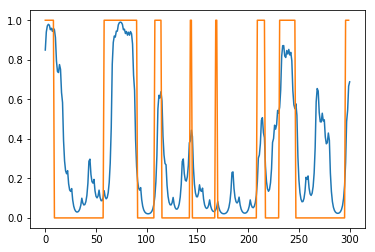

In [247]:
plt.plot(post)
plt.plot(states)
plt.show()
#Графики апостериорных вероятностей и график для нечестной кости значение 1 - соответствует нечестной кости

In [248]:
#Создадим новые матрицы переходов и эмиссия
N = 100 # кол-во новых последовательностей для алгоритма Баум-Велша
transition_rand = [[0.7,0.3],[0.4,0.6]]
emission_rand =[[0.1, 0.15, 0.2, 0.15, 0.27, 0.13], [0.09, 0.2, 0.21, 0.25, 0.12, 0.13]]

def  Baum_Welch(transition_rand,emission_rand,N,L):
    observations_pos = []
    states_pos = []
    F_k_pos = []
    B_k_pos = []
    post_pos = []
    for i in range(N):#генерируем новые матрицы состояний и наблюдений
        buf_states,buf_observations = gen_HMM(transition_rand,emission_rand,L)
        observations_pos.append(buf_observations)
        states_pos.append(buf_states)
    for i in range(N):#Считаем переходы и составляем новые нормированые матрицы
        F_k_pos.append(forward_look(transition_rand,emission_rand,L,observations_pos[i])[0])
        B_k_pos.append(backward_look(transition_rand,emission_rand,L,observations_pos[i])[0])
        post_pos.append(posterior_decoding(F_k_pos[i],B_k_pos[i],L))
        T = [[0,0],[0,0]]
        E = [[0,0,0,0,0,0],[0,0,0,0,0,0]]
        for j in range(L):
            if post_pos[i][j] > 0.5 and post_pos[i][j+1] > 0.5:
                T[0][0] += 1
            elif post_pos[i][j] <= 0.5 and post_pos[i][j+1] <= 0.5:
                T[1][1] += 1
            elif post_pos[i][j] <= 0.5 and post_pos[i][j+1] > 0.5:
                T[1][0] += 1
            elif post_pos[i][j] > 0.5 and post_pos[i][j+1] <= 0.5:
                T[0][1] += 1
            if post_pos[i][j] > 0.5:    
                if observations_pos[i][j] == 1:
                    E[0][0] += 1
                if observations_pos[i][j] == 2:
                    E[0][1] += 1
                if observations_pos[i][j] == 3:
                    E[0][2] += 1
                if observations_pos[i][j] == 4:
                    E[0][3] += 1
                if observations_pos[i][j] == 5:
                    E[0][4] += 1
                if observations_pos[i][j] == 6:
                    E[0][5] += 1
            else:    
                if observations_pos[i][j] == 1:
                    E[1][0] += 1
                if observations_pos[i][j] == 2:
                    E[1][1] += 1
                if observations_pos[i][j] == 3:
                    E[1][2] += 1
                if observations_pos[i][j] == 4:
                    E[1][3] += 1
                if observations_pos[i][j] == 5:
                    E[1][4] += 1
                if observations_pos[i][j] == 6:
                    E[1][5] += 1
       # print(T[0][0], T[0][1], T[1][0], T[1][1])
        if T[0][0] + T[0][1] != 0:
            transition_rand[0][0] = (transition_rand[0][0] + (T[0][0] / (T[0][0] + T[0][1]))) / 2
            transition_rand[0][1] = (transition_rand[0][1] + (T[0][1]/ (T[0][0] + T[0][1]))) / 2
        if T[1][0] + T[1][1]  != 0:
            T[1][0] = (T[1][0] + (T[1][0] / (T[1][0] + T[1][1]))) / 2
            T[1][1] = (T[1][1] + (T[1][1] / (T[1][0] + T[1][1]))) / 2
            
        sum_1 = E[0][0] +  E[0][1] +  E[0][2] +  E[0][3] +  E[0][4] +  E[0][5]
        sum_2 = E[1][0] +  E[1][1] +  E[1][2] +  E[1][3] +  E[1][4] +  E[1][5]
        if sum_1 != 0:
            emission_rand[0][0] = (emission_rand[0][0] + (E[0][0]/sum_1)) / 2
            emission_rand[0][1] = (emission_rand[0][1] + (E[0][1]/sum_1)) / 2
            emission_rand[0][2] = (emission_rand[0][2] + (E[0][2]/sum_1)) / 2
            emission_rand[0][3] = (emission_rand[0][3] + (E[0][3]/sum_1)) / 2
            emission_rand[0][4] = (emission_rand[0][4] + (E[0][4]/sum_1)) / 2
            emission_rand[0][5] = (emission_rand[0][5] + (E[0][5]/sum_1)) / 2
        if sum_2 != 0:
            emission_rand[1][0] = (emission_rand[1][0] + (E[0][0]/sum_2)) / 2
            emission_rand[1][1] = (emission_rand[1][1] + (E[1][1]/sum_2)) / 2
            emission_rand[1][2] = (emission_rand[1][2] + (E[1][2]/sum_2)) / 2
            emission_rand[1][3] = (emission_rand[1][3] + (E[1][3]/sum_2)) / 2
            emission_rand[1][4] = (emission_rand[1][4] + (E[1][4]/sum_2)) / 2
            emission_rand[1][5] = (emission_rand[1][5] + (E[1][5]/sum_2)) / 2
    return(transition_rand, emission_rand)
transition_rand, emission_rand = Baum_Welch(transition_rand,emission_rand,N,L)
print("матрица переходов\n",transition_rand,'\n', "Матрица эмиссий",emission_rand)

матрица переходов
 [[0.7060400353022511, 0.2939599646977489], [0.4, 0.6]] 
 Матрица эмиссий [[0.19338825002415022, 0.15898061903394628, 0.1951679567299822, 0.15453705845643206, 0.14448539256871795, 0.1534407231867713], [0.05021200350157405, 0.15436747138589388, 0.18089020593474744, 0.16880155918040401, 0.1655398793190549, 0.1588773879340697]]
